<a href="https://colab.research.google.com/github/saipranathi2022-dot/Qiskit_Hadamard_Visualization/blob/main/Qiskit_Hadamard_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.0 MB/s eta 0:00:00


In [2]:


import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from IPython.display import display

sim = AerSimulator()


--- |0> ---
Statevector after H: [0.70710678+0.j 0.70710678+0.j]


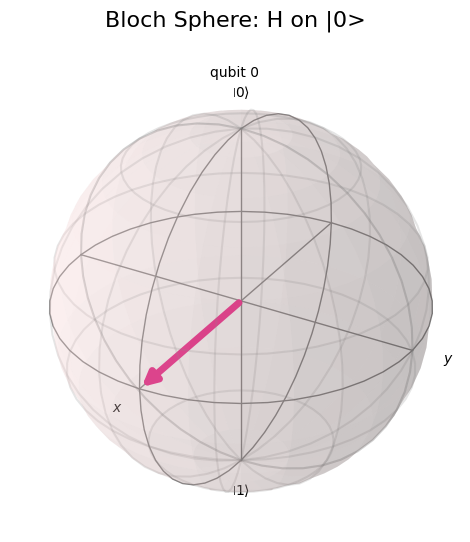

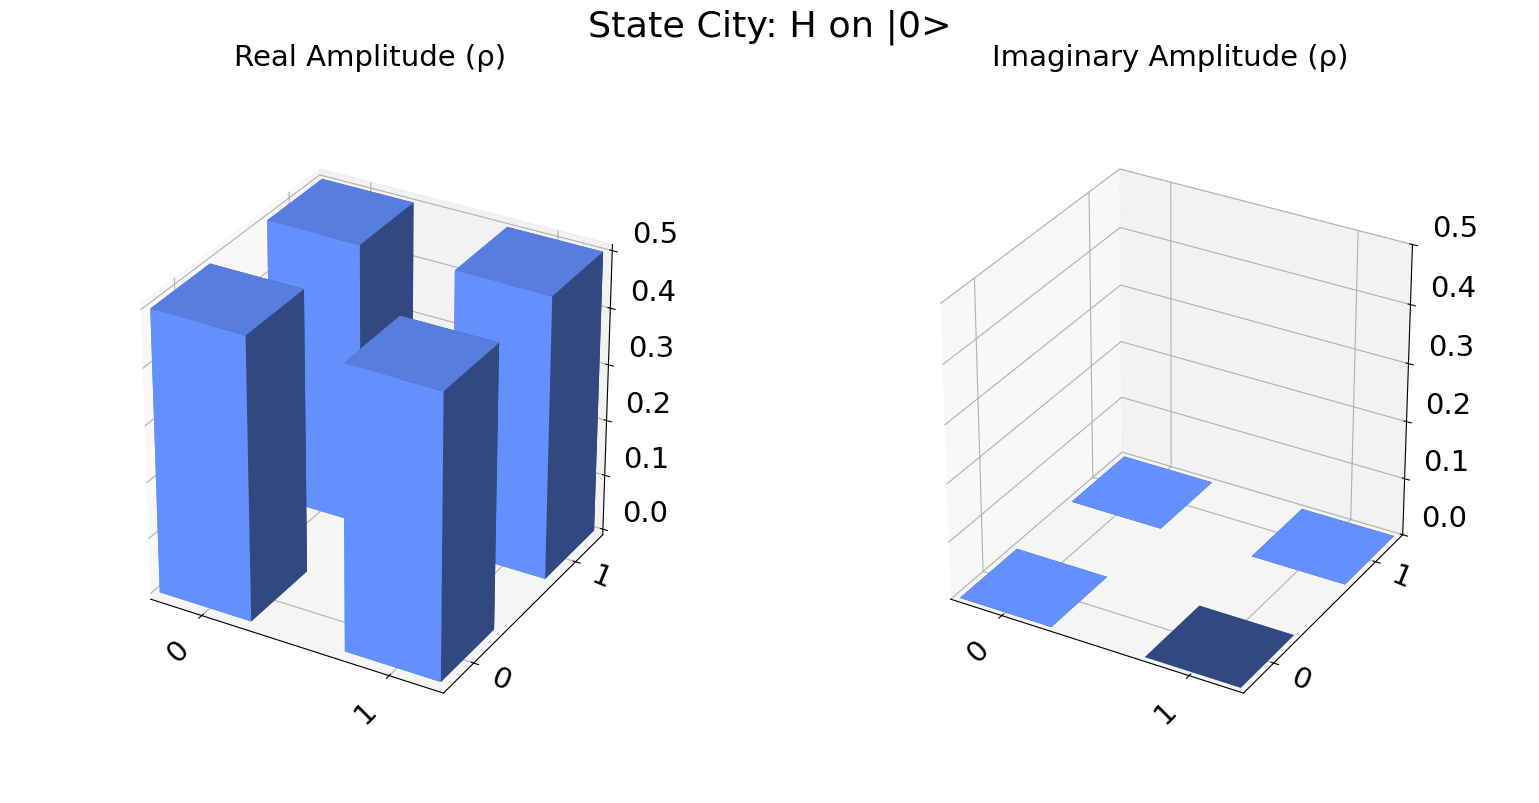

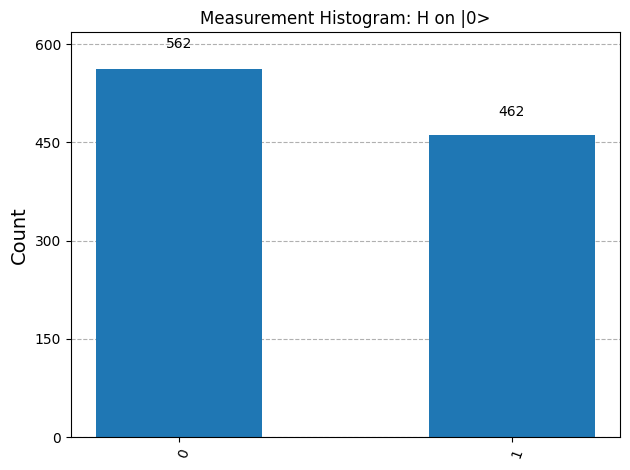



--- |1> ---
Statevector after H: [ 0.70710678+0.j -0.70710678+0.j]


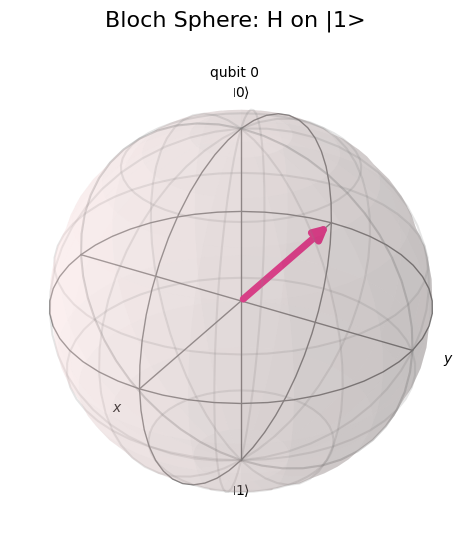

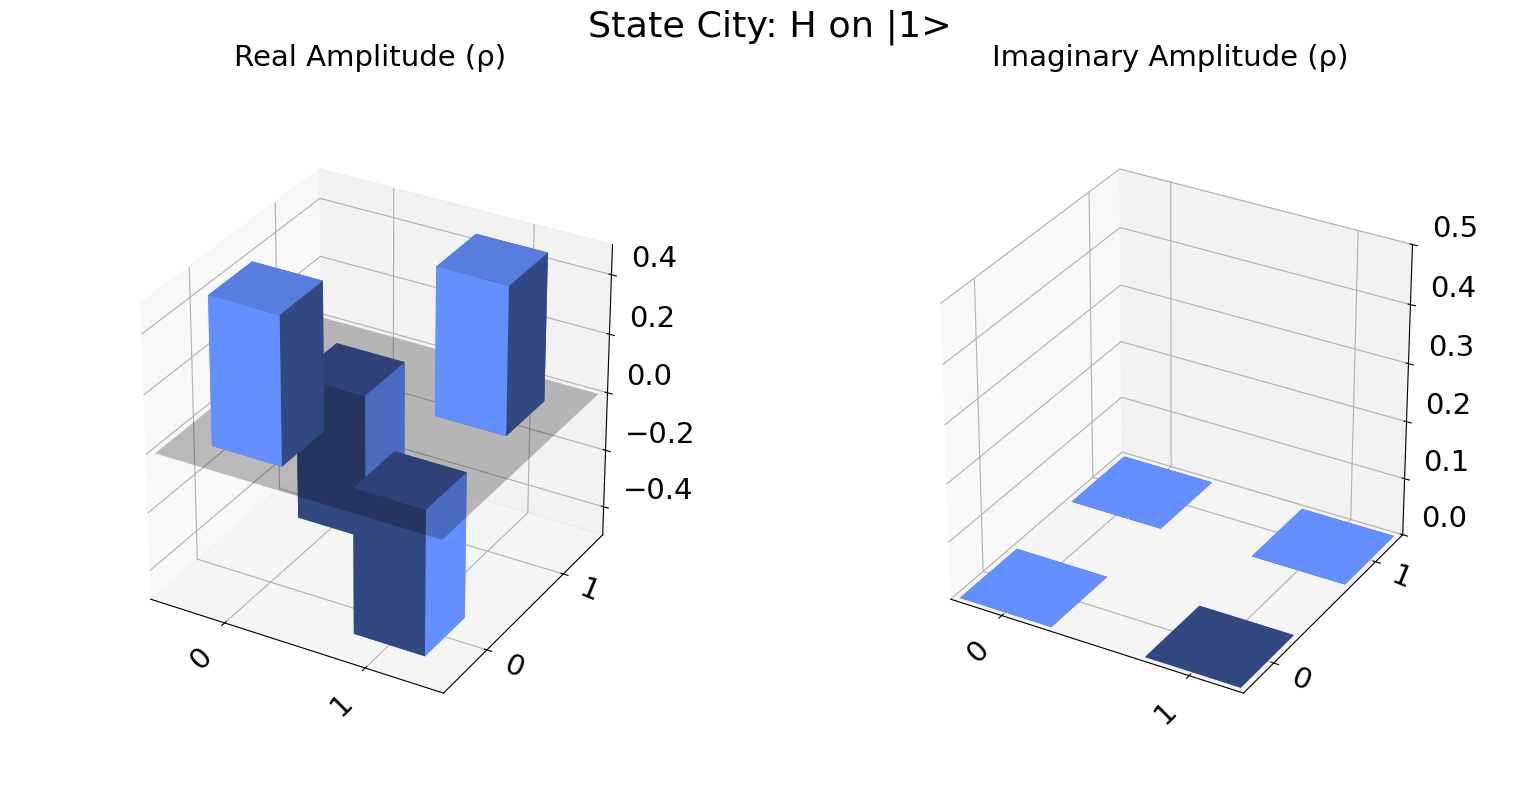

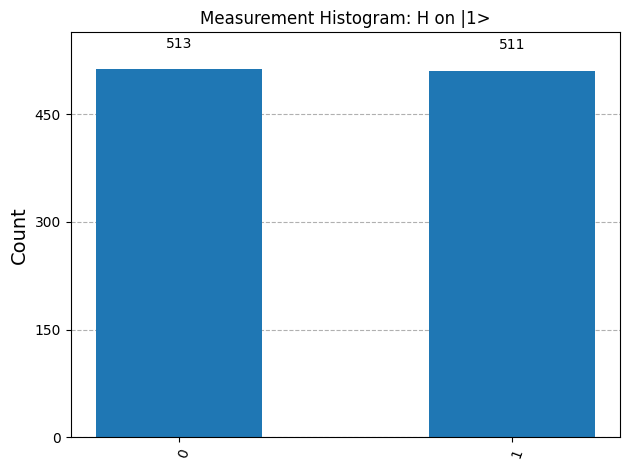



--- |+> ---
Statevector after H: [1.+0.j 0.+0.j]


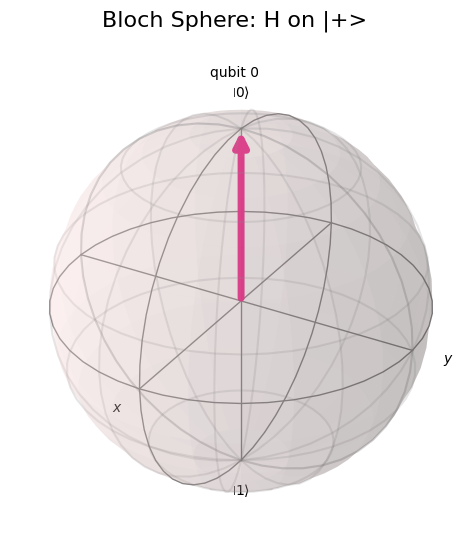

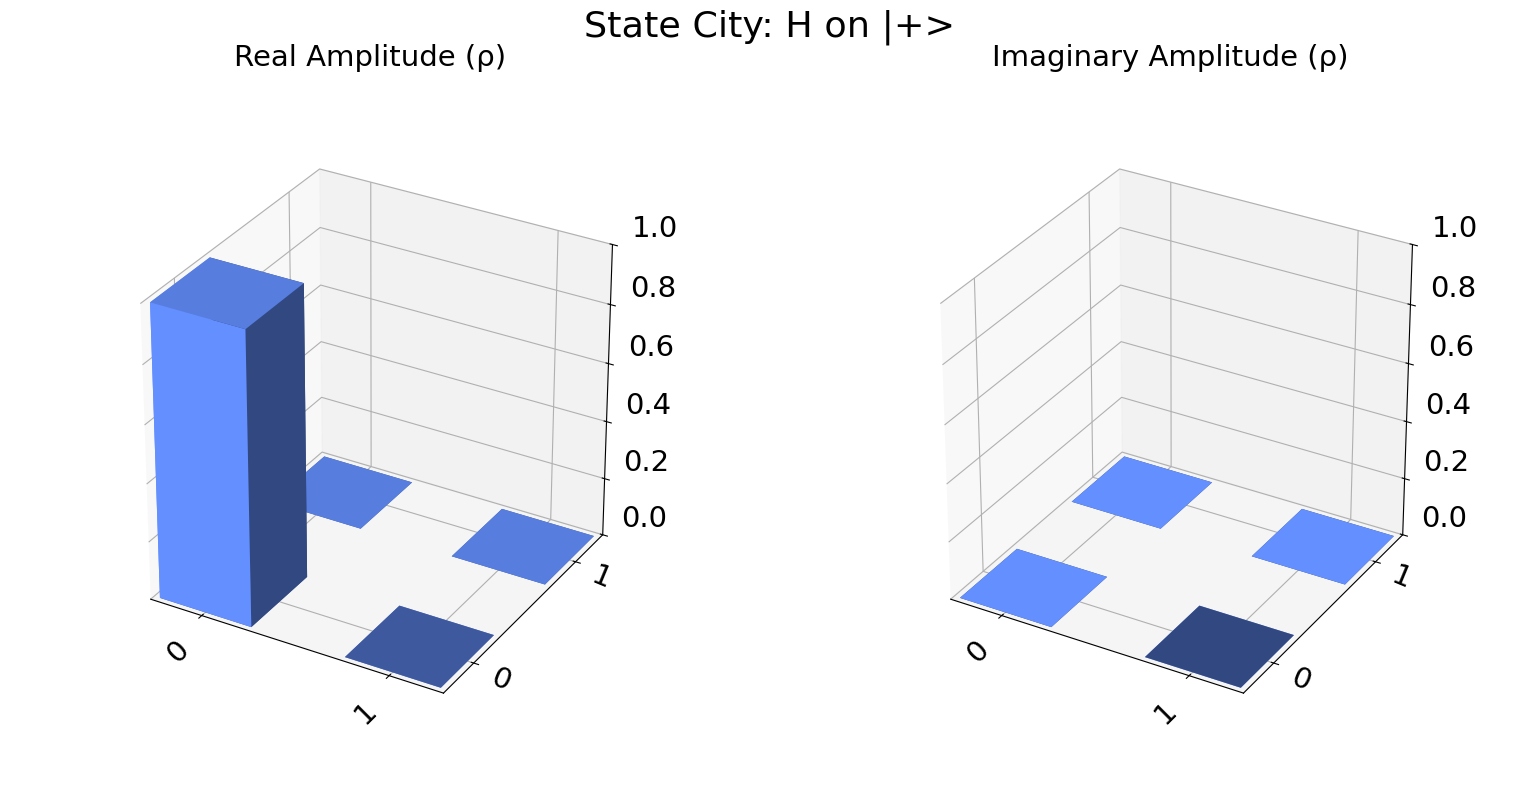

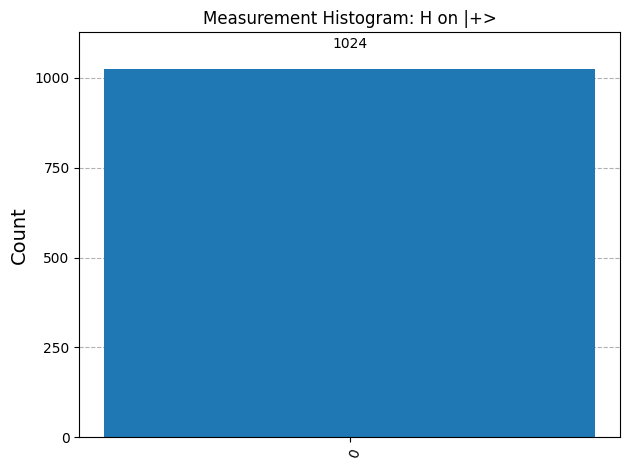



--- |-> ---
Statevector after H: [0.+0.j 1.+0.j]


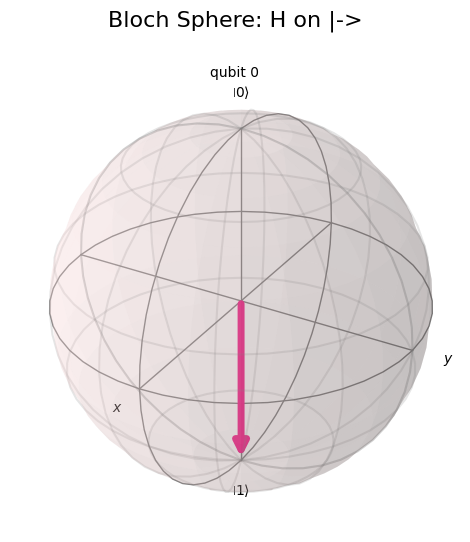

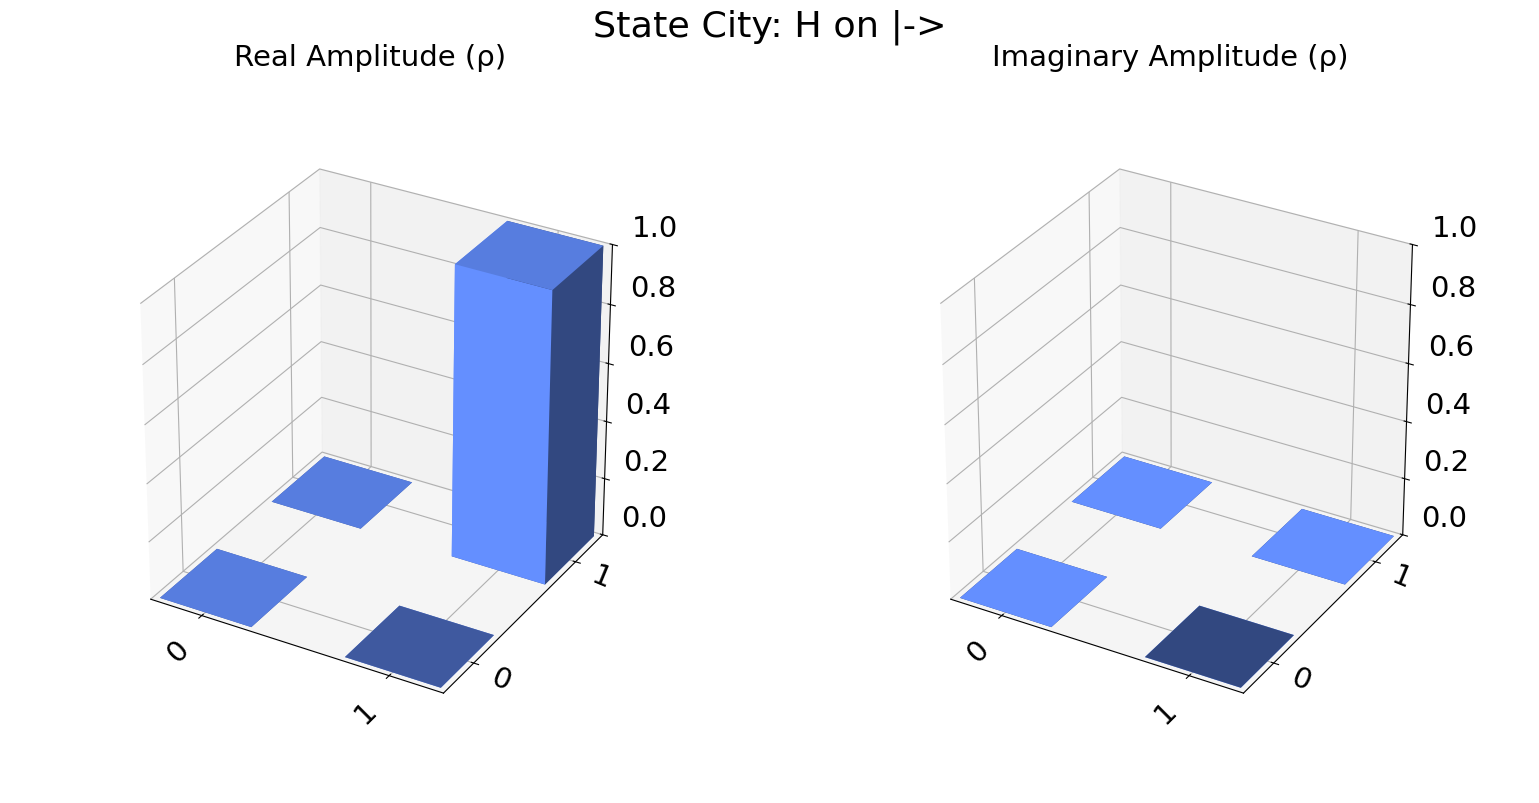

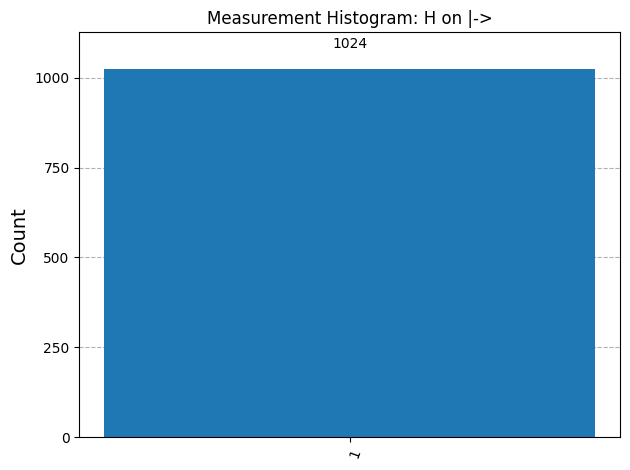

In [3]:
# -------------------------
# Task 1: Single-Qubit Hadamard Transformations
# -------------------------

def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector after Hadamard
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("Statevector after H:", state_after.data)

    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")   # expected (|0>+|1>)/√2

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")   # expected (|0>-|1>)/√2

# |+>
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")   # expected |0>

# |->
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")  # expected |1>


--- Task 2: H⊗H⊗H on |000> ---
Statevector amplitudes:
 |000> : (0.3535533905932737+0j)
 |001> : (0.3535533905932737+0j)
 |010> : (0.3535533905932737+0j)
 |011> : (0.3535533905932737+0j)
 |100> : (0.3535533905932737+0j)
 |101> : (0.3535533905932737+0j)
 |110> : (0.3535533905932737+0j)
 |111> : (0.3535533905932737+0j)


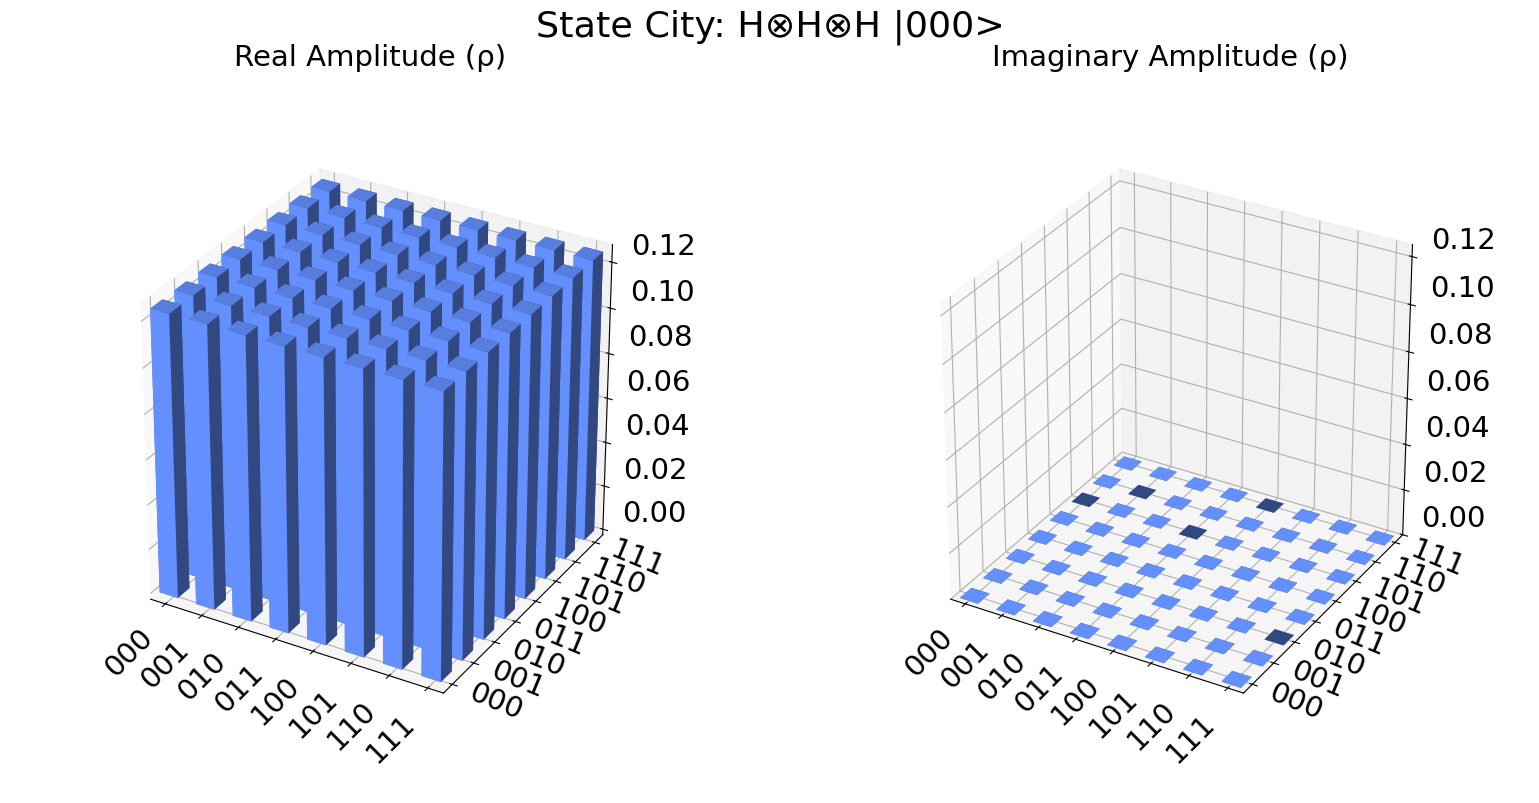

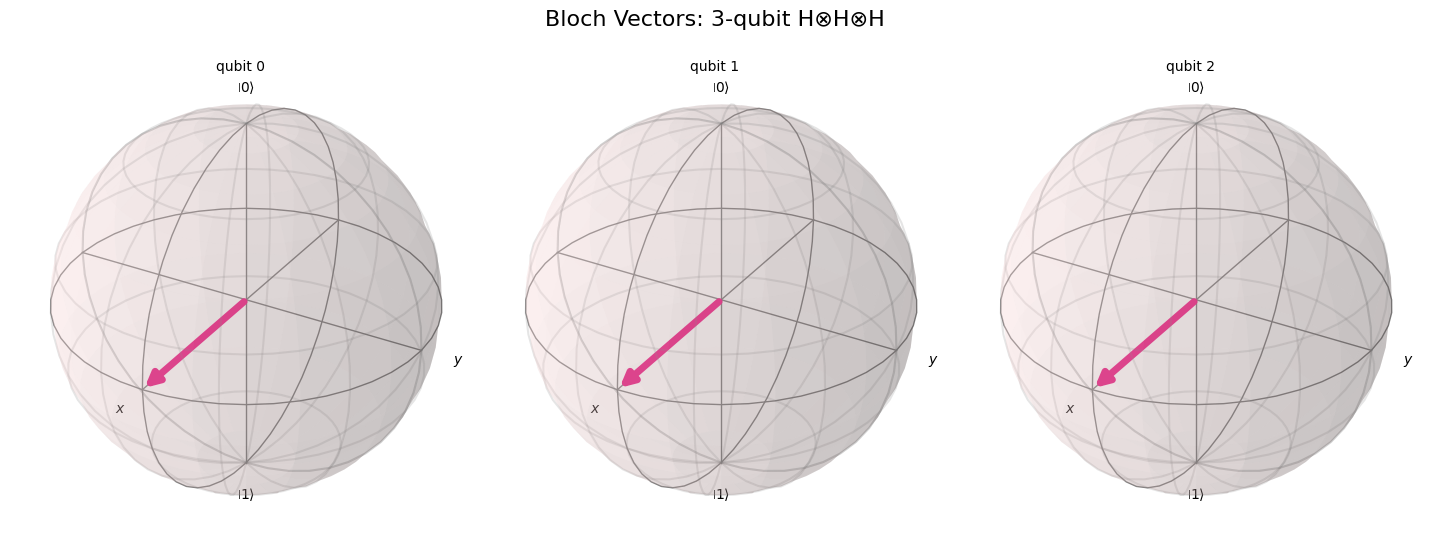

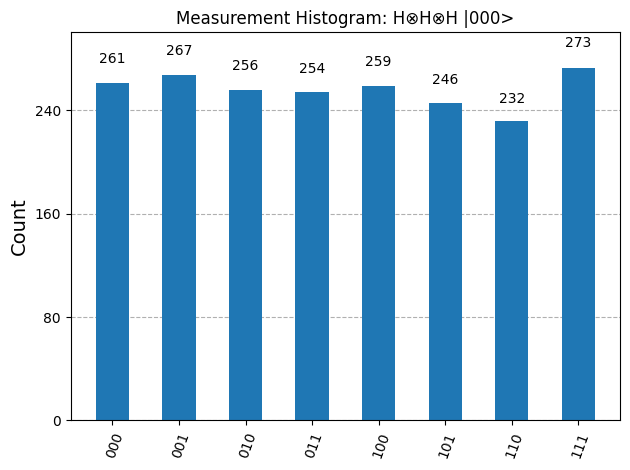


Analytical: All 8 basis states appear with equal probability 1/8 ≈ 0.125


In [4]:
# -------------------------
# Task 2: Three-Qubit H⊗H⊗H
# -------------------------

qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- Task 2: H⊗H⊗H on |000> ---")
print("Statevector amplitudes:")
for idx, amp in enumerate(state3.data):
    print(f" |{idx:03b}> : {amp}")

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch Vectors: 3-qubit H⊗H⊗H"))

# Simulation
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=2048).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))

print("\nAnalytical: All 8 basis states appear with equal probability 1/8 ≈ 0.125")


--- Task 3: GHZ-like state (H + CX + CX) ---
Statevector amplitudes:
 |000> : (0.7071067811865475+0j)
 |001> : 0j
 |010> : 0j
 |011> : 0j
 |100> : 0j
 |101> : 0j
 |110> : 0j
 |111> : (0.7071067811865475+0j)


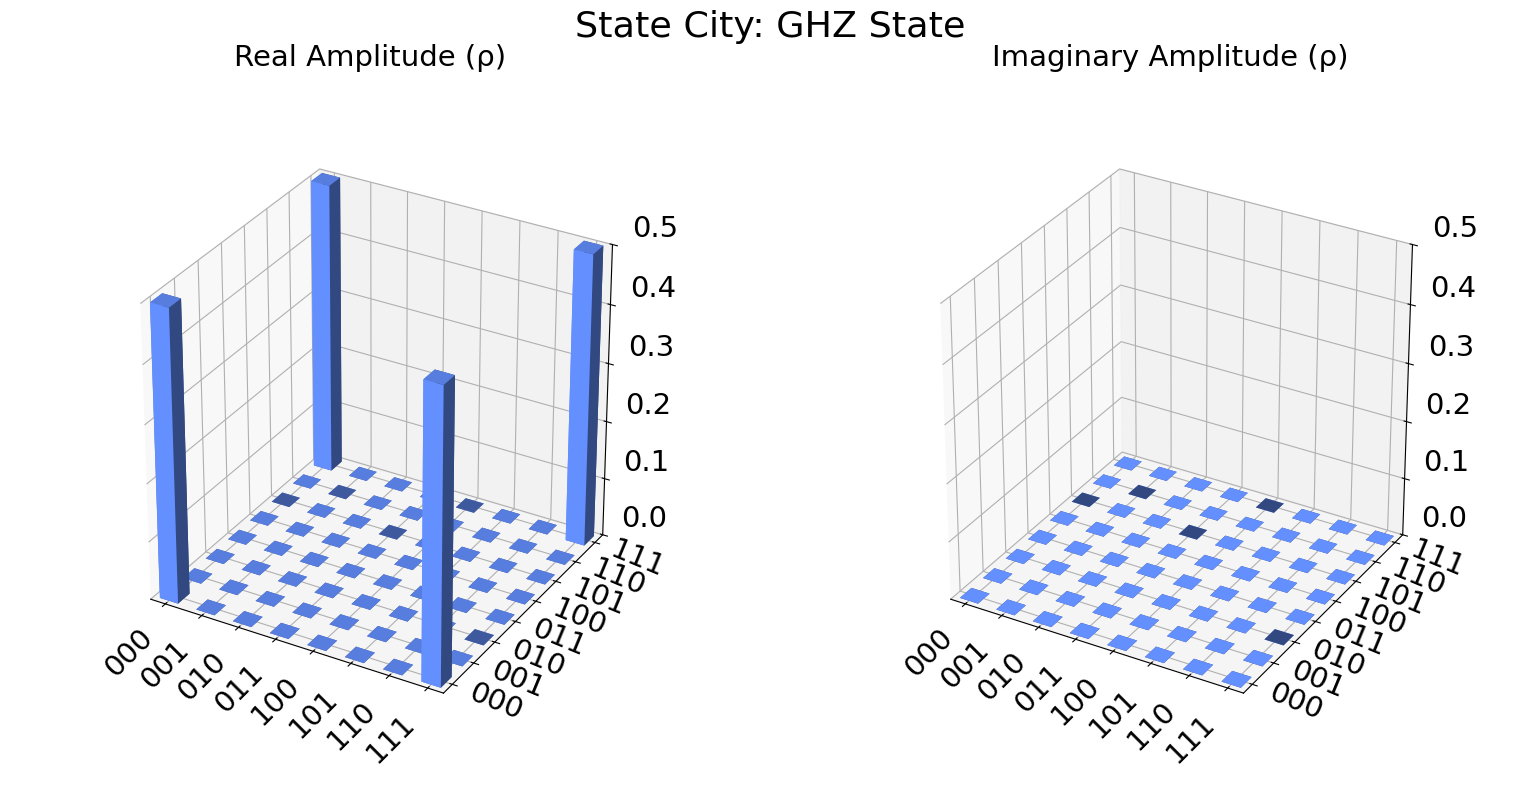

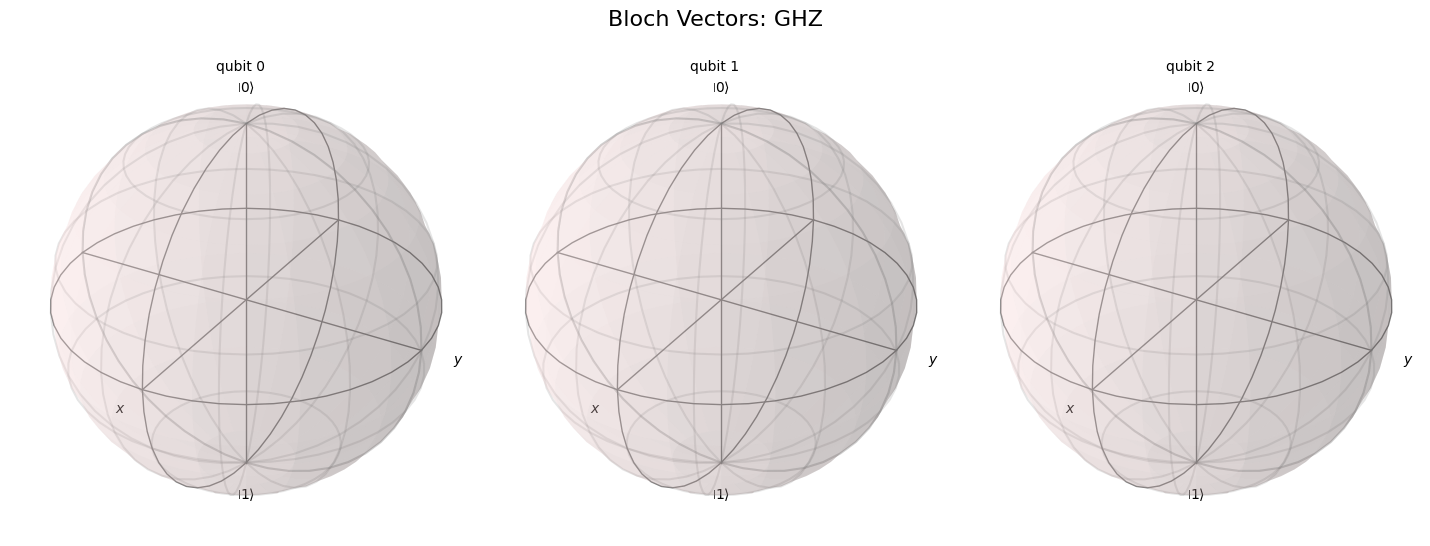

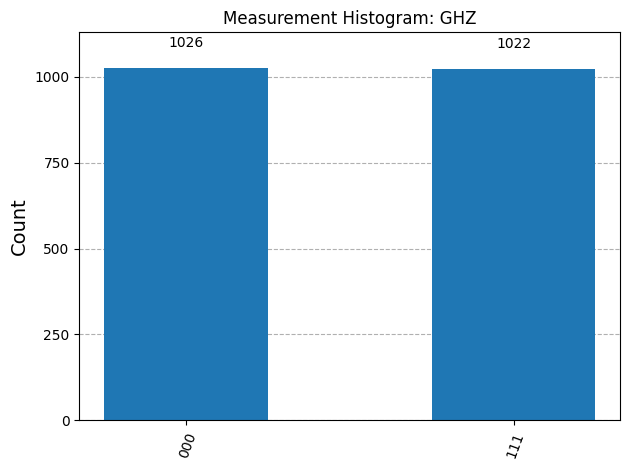


Analytical: Only |000> and |111> occur, each with probability 1/2.
Perfect 3-qubit correlations.



In [5]:
# -------------------------
# Task 3: H + CX + CX on 3 Qubits (GHZ state)
# -------------------------

qc_ghz = QuantumCircuit(3, 3)
qc_ghz.h(0)
qc_ghz.cx(0, 1)
qc_ghz.cx(0, 2)
qc_ghz.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc_ghz_state = QuantumCircuit(3)
qc_ghz_state.h(0)
qc_ghz_state.cx(0, 1)
qc_ghz_state.cx(0, 2)
state_ghz = Statevector.from_instruction(qc_ghz_state)

print("--- Task 3: GHZ-like state (H + CX + CX) ---")
print("Statevector amplitudes:")
for idx, amp in enumerate(state_ghz.data):
    print(f" |{idx:03b}> : {amp}")

display(plot_state_city(state_ghz, title="State City: GHZ State"))
display(plot_bloch_multivector(state_ghz, title="Bloch Vectors: GHZ"))

# Simulation
qc_ghz_t = transpile(qc_ghz, sim)
result_ghz = sim.run(qc_ghz_t, shots=2048).result()
counts_ghz = result_ghz.get_counts()
display(plot_histogram(counts_ghz, title="Measurement Histogram: GHZ"))

print("\nAnalytical: Only |000> and |111> occur, each with probability 1/2.")
print("Perfect 3-qubit correlations.\n")


--- Task 4: H twice on |1> ---
Statevector after H then H: [0.+0.j 1.+0.j]


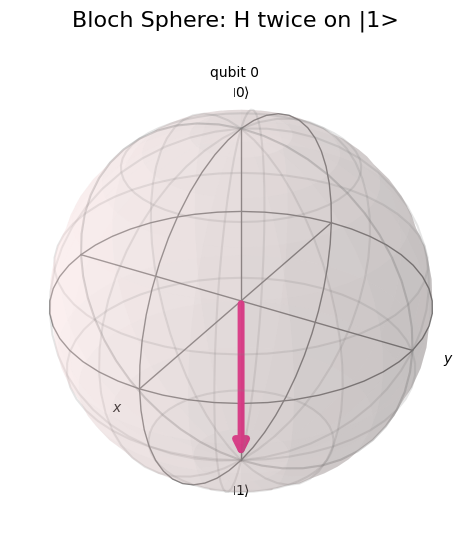

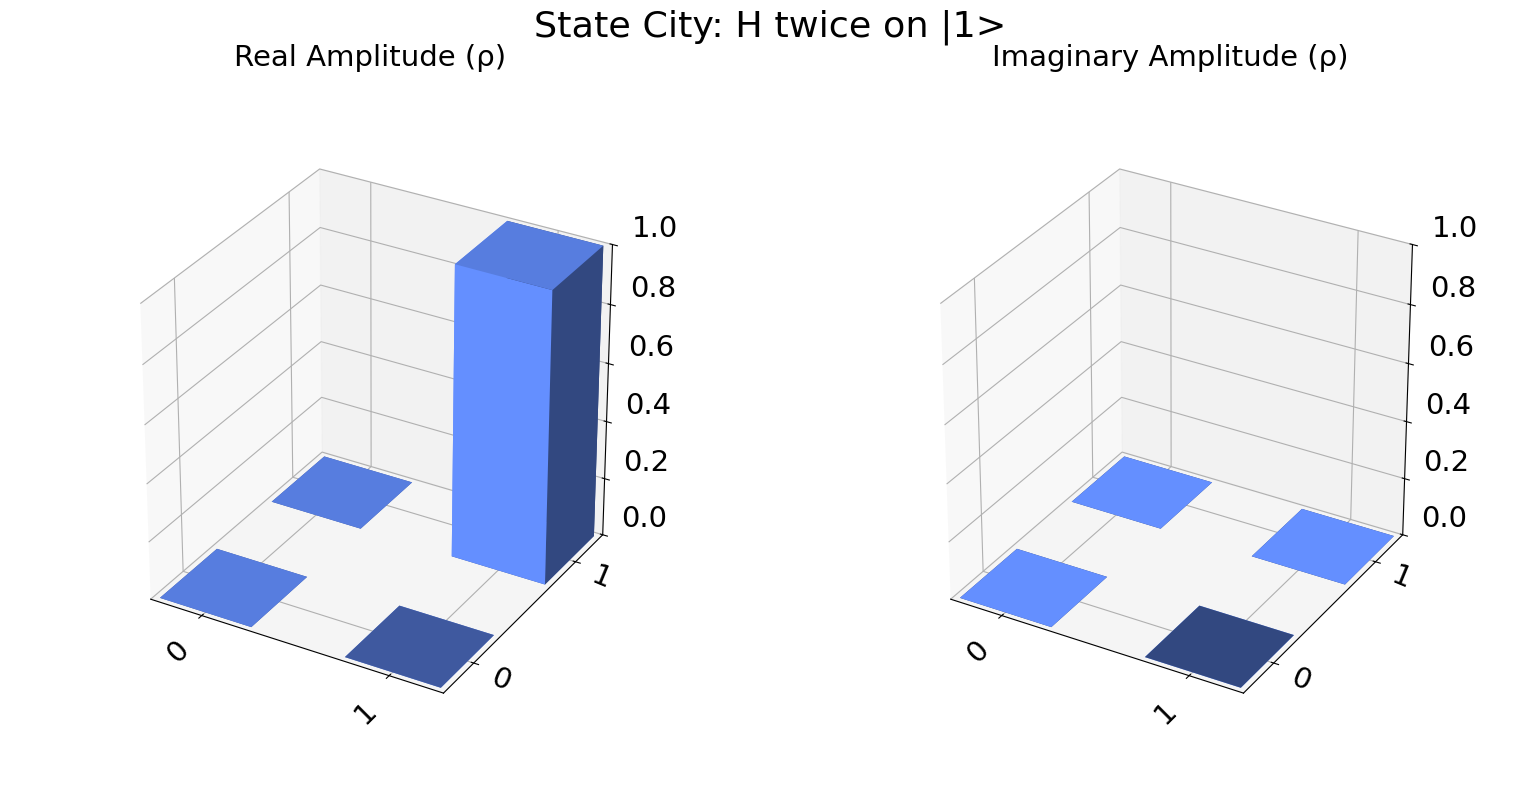


Expected: The state returns exactly to |1> ([0, 1]) because H·H = I



In [6]:
# -------------------------
# Task 4: Apply H Twice on |1>
# -------------------------

qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0, 1], 0)  # Start with |1>
qc_h2.h(0)
qc_h2.h(0)

state_h2 = Statevector.from_instruction(qc_h2)

print("--- Task 4: H twice on |1> ---")
print("Statevector after H then H:", state_h2.data)

display(plot_bloch_multivector(state_h2, title="Bloch Sphere: H twice on |1>"))
display(plot_state_city(state_h2, title="State City: H twice on |1>"))

print("\nExpected: The state returns exactly to |1> ([0, 1]) because H·H = I\n")


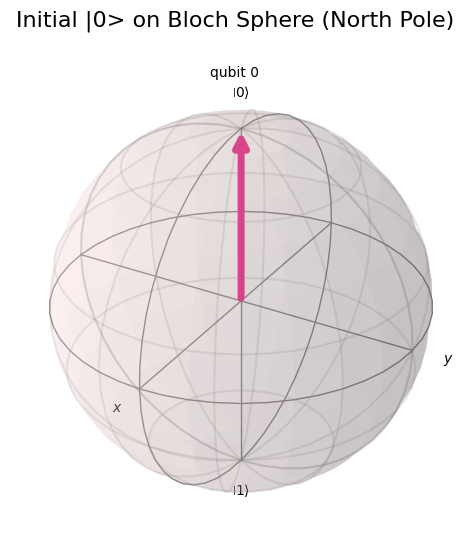

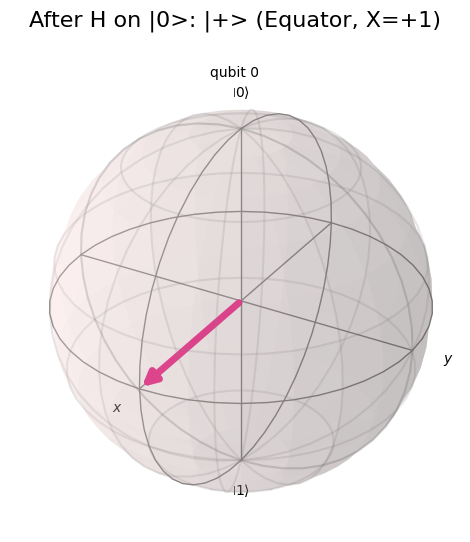

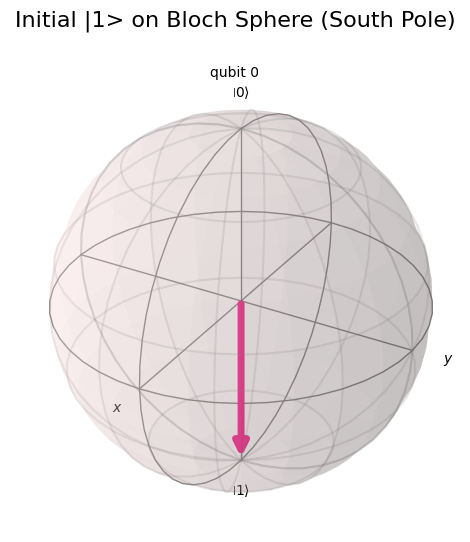

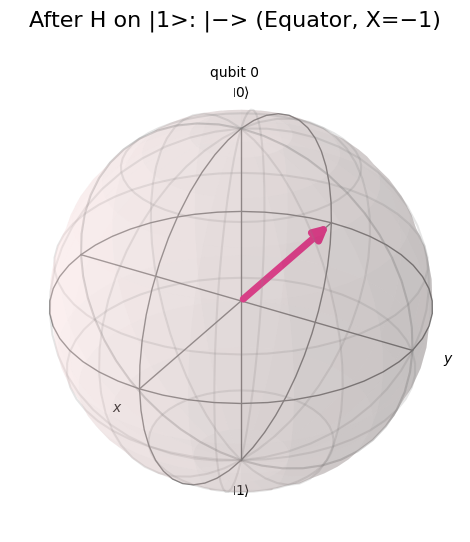

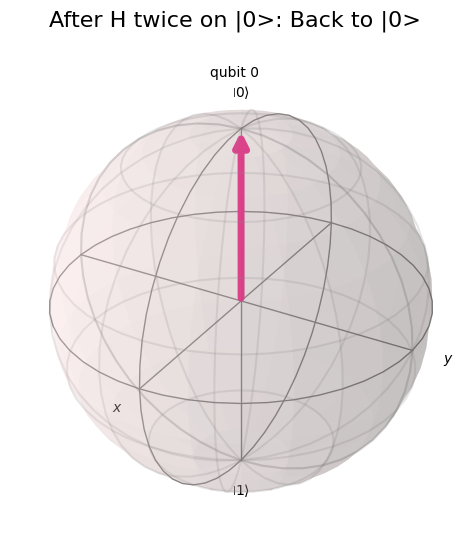

✅ Bloch Sphere Observations:
- |0> starts at north pole. After H, it moves to +X on the equator (|+>).
- |1> starts at south pole. After H, it moves to -X on the equator (|−>).
- Applying H twice brings states back to their original poles (H·H = I).


In [7]:
# -------------------------
# Task 5: Bloch Sphere Observations for Hadamard Rotations
# -------------------------

# Start with |0>  (north pole)
qc_0 = QuantumCircuit(1)
qc_0.initialize([1, 0], 0)  # |0>
state_0 = Statevector.from_instruction(qc_0)
display(plot_bloch_multivector(state_0, title="Initial |0> on Bloch Sphere (North Pole)"))

# Apply Hadamard to |0> → moves to |+> on equator (x = +1)
qc_0_h = QuantumCircuit(1)
qc_0_h.initialize([1, 0], 0)
qc_0_h.h(0)
state_0_h = Statevector.from_instruction(qc_0_h)
display(plot_bloch_multivector(state_0_h, title="After H on |0>: |+> (Equator, X=+1)"))


# Start with |1>  (south pole)
qc_1 = QuantumCircuit(1)
qc_1.initialize([0, 1], 0)  # |1>
state_1 = Statevector.from_instruction(qc_1)
display(plot_bloch_multivector(state_1, title="Initial |1> on Bloch Sphere (South Pole)"))

# Apply Hadamard to |1> → moves to |−> on equator (x = -1)
qc_1_h = QuantumCircuit(1)
qc_1_h.initialize([0, 1], 0)
qc_1_h.h(0)
state_1_h = Statevector.from_instruction(qc_1_h)
display(plot_bloch_multivector(state_1_h, title="After H on |1>: |−> (Equator, X=−1)"))


# Apply H twice on |0> → should return to |0>
qc_0_h2 = QuantumCircuit(1)
qc_0_h2.initialize([1, 0], 0)
qc_0_h2.h(0)
qc_0_h2.h(0)
state_0_h2 = Statevector.from_instruction(qc_0_h2)
display(plot_bloch_multivector(state_0_h2, title="After H twice on |0>: Back to |0>"))

# 📌 Summary
print("✅ Bloch Sphere Observations:")
print("- |0> starts at north pole. After H, it moves to +X on the equator (|+>).")
print("- |1> starts at south pole. After H, it moves to -X on the equator (|−>).")
print("- Applying H twice brings states back to their original poles (H·H = I).")
